In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cosine
from sklearn.metrics import pairwise_distances
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [4]:
df = pd.read_csv('data/airline.csv')

/Users/dgoldma1/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (77,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [82]:
corr=df.corr()

In [84]:
corr=df.drop(['Year','Quarter','Month'],1).corr()

In [85]:
corr

,DayofMonth,DayOfWeek,AirlineID,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginStateFips,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestStateFips,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,time
DayofMonth,1.000000,-0.027902,-0.005254,0.014570,-0.001056,-0.001056,-0.003100,-0.000127,0.005127,-0.000905,-0.000905,-0.003044,-0.000718,0.005145,-0.012761,-0.025984,-0.157051,-0.143680,-0.190200,-0.183384,-0.033699,-0.023723,0.003072,-0.066519,-0.003186,0.005811,-0.175493,-0.149007,-0.188864,-0.193421,-0.008536,-0.006124,-0.023426,-0.040000,-0.030832,NaN,-0.026163,-0.026193,-0.002448,-0.024105,-0.009744,-0.001016,-0.078772,-0.013826,-0.143750,-0.143778,-0.012906
DayOfWeek,-0.027902,1.000000,0.008567,0.013287,0.004737,0.004737,0.006393,-0.002203,-0.006104,0.004492,0.004492,0.006399,-0.001836,-0.007120,0.015144,0.014525,0.017254,0.015928,0.018531,0.018761,-0.024878,0.012613,0.005392,-0.000838,0.010991,0.004493,0.013549,0.013859,0.017061,0.015229,-0.005550,-0.000804,0.024169,0.023139,0.027161,NaN,0.026330,0.026313,0.012757,-0.020101,-0.022558,0.010575,0.019949,-0.018552,-0.045940,-0.045584,0.015181
AirlineID,-0.005254,0.008567,1.000000,0.303313,-0.005522,-0.005523,0.027484,0.069158,-0.050480,-0.005509,-0.005510,0.028031,0.069177,-0.050365,-0.001042,-0.001108,0.022766,0.038498,0.015895,0.026895,0.175956,0.001017,-0.024480,0.103853,-0.029009,-0.022968,0.072265,0.067080,0.063600,0.079587,0.013100,0.003506,-0.035013,-0.007916,-0.040561,NaN,-0.050264,-0.048148,0.003744,0.015138,0.153328,0.009903,-0.000584,0.015713,0.160732,0.163900,-0.000169
FlightNum,0.014570,0.013287,0.303313,1.000000,-0.013101,-0.013101,0.036257,0.028004,0.121476,-0.012256,-0.012256,0.038792,0.031469,0.117641,-0.005468,0.002301,0.024760,0.032092,0.020598,0.027029,0.048348,0.008530,-0.017685,0.001791,-0.027823,-0.013706,0.053137,0.045041,0.040265,0.057033,0.015764,0.009919,-0.330932,-0.319999,-0.335150,NaN,-0.347783,-0.343340,0.013536,0.000673,-0.010526,-0.010328,0.066484,0.033271,0.114289,0.124579,-0.005831
OriginAirportID,-0.001056,0.004737,-0.005522,-0.013101,1.000000,1.000000,0.630826,-0.113108,0.260571,0.018392,0.018392,-0.005244,-0.060473,0.129987,-0.032166,-0.032250,-0.001960,0.003354,-0.005450,-0.000172,-0.054416,-0.035844,-0.006678,0.033854,-0.007305,-0.005269,0.010441,0.006158,0.000380,0.010758,0.003166,-0.000107,0.041364,0.048840,0.054449,NaN,0.075368,0.082009,-0.027963,0.024853,0.002660,0.004287,0.039220,-0.027528,0.003358,0.006084,-0.032456
OriginAirportSeqID,-0.001056,0.004737,-0.005523,-0.013101,1.000000,1.000000,0.630827,-0.113108,0.260571,0.018392,0.018392,-0.005244,-0.060473,0.129987,-0.032166,-0.032250,-0.001960,0.003353,-0.005451,-0.000172,-0.054416,-0.035843,-0.006678,0.033854,-0.007305,-0.005269,0.010441,0.006158,0.000380,0.010758,0.003166,-0.000107,0.041363,0.048840,0.054449,NaN,0.075368,0.082008,-0.027963,0.024853,0.002660,0.004287,0.039220,-0.027528,0.003358,0.006084,-0.032456
OriginCityMarketID,-0.003100,0.006393,0.027484,0.036257,0.630826,0.630827,1.000000,0.018458,0.082203,-0.004876,-0.004876,-0.056520,-0.063773,0.052283,-0.050856,-0.052482,-0.026876,-0.017022,-0.038579,-0.031883,-0.066048,-0.053569,-0.039762,0.079621,-0.045457,-0.036042,-0.017983,-0.013554,-0.030219,-0.022634,-0.001911,0.001797,0.012629,0.016537,0.018812,NaN,0.019444,0.022305,-0.024342,-0.023358,0.023492,0.007194,0.048785,-0.074204,-0.022275,-0.018155,-0.051349
OriginStateFips,-0.000127,-0.002203,0.069158,0.028004,-0.113108,-0.113108,0.018458,1.000000,-0.053911,-0.059864,-0.059864,-0.062927,0.022511,-0.042088,-0.031118,-0.029277,-0.004326,-0.002396,-0.003389,-0.005943,0.043089,-0.024088,-0.018104,0.030

In [90]:
cols=df.columns.values

In [92]:
train_cols=[s for s in cols if s.find('Delay')<=-1]

In [95]:
train_cols.append('DepDelay')

In [98]:
train_cols=train_cols[3:]

In [94]:
df

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,time
0,2015,1,1,1,4,2015-01-01,AA,19805,AA,N787AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,855.0,-5.0,0.0,0.0,-1.0,0900-0959,17.0,912.0,1230.0,7.0,1230,1237.0,7.0,7.0,0.0,0.0,1200-1259,0.0,NaN,0.0,390.0,402.0,378.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900
1,2015,1,1,2,5,2015-01-02,AA,19805,AA,N795AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,850.0,-10.0,0.0,0.0,-1.0,0900-0959,15.0,905.0,1202.0,9.0,1230,1211.0,-19.0,0.0,0.0,-2.0,1200-1259,0.0,NaN,0.0,390.0,381.0,357.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900
2,2015,1,1,3,6,2015-01-03,AA,19805,AA,N788AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,853.0,-7.0,0.0,0.0,-1.0,0900-0959,15.0,908.0,1138.0,13.0,1230,1151.0,-39.0,0.0,0.0,-2.0,1200-1259,0.0,NaN,0.0,390.0,358.0,330.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900
3,2015,1,1,4,7,2015-01-04,AA,19805,AA,N791AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,853.0,-7.0,0.0,0.0,-1.0,0900-0959,14.0,907.0,1159.0,19.0,1230,1218.0,-12.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,390.0,385.0,352.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900
4,2015,1,1,5,1,2015-01-05,AA,19805,AA,N783AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,853.0,-7.0,0.0,0.0,-1.0,0900-0959,27.0,920.0,1158.0,24.0,1230,1222.0,-8.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,390.0,389.0,338.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900
5,2015,1,1,6,2,2015-01-06,AA,19805,AA,N799AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,856.0,-4.0,0.0,0.0,-1.0,0900-0959,85.0,1021.0,1256.0,4.0,1235,1300.0,25.0,25.0,1.0,1.0,1200-1259,0.0,NaN,0.0,395.0,424.0,335.0,1.0,2475.0,10,0.0,0.0,25.0,0.0,0.0,NaN,NaN,NaN,900
6,2015,1,1,7,3,2015-01-07,AA,19805,AA,N784AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,859.0,-1.0,0.0,0.0,-1.0,0900-0959,29.0,928.0,1209.0,12.0,1235,1221.0,-14.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,395.0,382.0,341.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900
7,2015,1,1,8,4,2015-01-08,AA,19805,AA,N787AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,856.0,-4.0,0.0,0.0,-1.0,0900-0959,26.0,922.0,1155.0,3.0,1235,1158.0,-37.0,0.0,0.0,-2.0,1200-1259,0.0,NaN,0.0,395.0,362.0,333.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900
8,2015,1,1,9,5,2015-01-09,AA,19805,AA,N795AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,901.0,1.0,1.0,0.0,0.0,0900-0959,43.0,944.0,1237.0,4.0,1235,1241.0,6.0,6.0,0.0,0.0,1200-1259,0.0,NaN,0.0,395.0,400.0,353.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900
9,2015,1,1,10,6,2015-01-10,AA,19805,AA,N790AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,3

In [100]:
corr

,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDel15,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDel15,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,FirstDepTime,TotalAddGTime,LongestAddGTime,time,DepDelay
0,1,4,2015-01-01,AA,19805,AA,N787AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,855.0,0.0,0900-0959,17.0,912.0,1230.0,7.0,1230,1237.0,0.0,1200-1259,0.0,NaN,0.0,390.0,402.0,378.0,1.0,2475.0,10,NaN,NaN,NaN,900,-5.0
1,2,5,2015-01-02,AA,19805,AA,N795AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,850.0,0.0,0900-0959,15.0,905.0,1202.0,9.0,1230,1211.0,0.0,1200-1259,0.0,NaN,0.0,390.0,381.0,357.0,1.0,2475.0,10,NaN,NaN,NaN,900,-10.0
2,3,6,2015-01-03,AA,19805,AA,N788AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,853.0,0.0,0900-0959,15.0,908.0,1138.0,13.0,1230,1151.0,0.0,1200-1259,0.0,NaN,0.0,390.0,358.0,330.0,1.0,2475.0,10,NaN,NaN,NaN,900,-7.0
3,4,7,2015-01-04,AA,19805,AA,N791AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,853.0,0.0,0900-0959,14.0,907.0,1159.0,19.0,1230,1218.0,0.0,1200-1259,0.0,NaN,0.0,390.0,385.0,352.0,1.0,2475.0,10,NaN,NaN,NaN,900,-7.0
4,5,1,2015-01-05,AA,19805,AA,N783AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,853.0,0.0,0900-0959,27.0,920.0,1158.0,24.0,1230,1222.0,0.0,1200-1259,0.0,NaN,0.0,390.0,389.0,338.0,1.0,2475.0,10,NaN,NaN,NaN,900,-7.0
5,6,2,2015-01-06,AA,19805,AA,N799AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,856.0,0.0,0900-0959,85.0,1021.0,1256.0,4.0,1235,1300.0,1.0,1200-1259,0.0,NaN,0.0,395.0,424.0,335.0,1.0,2475.0,10,NaN,NaN,NaN,900,-4.0
6,7,3,2015-01-07,AA,19805,AA,N784AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,859.0,0.0,0900-0959,29.0,928.0,1209.0,12.0,1235,1221.0,0.0,1200-1259,0.0,NaN,0.0,395.0,382.0,341.0,1.0,2475.0,10,NaN,NaN,NaN,900,-1.0
7,8,4,2015-01-08,AA,19805,AA,N787AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,856.0,0.0,0900-0959,26.0,922.0,1155.0,3.0,1235,1158.0,0.0,1200-1259,0.0,NaN,0.0,395.0,362.0,333.0,1.0,2475.0,10,NaN,NaN,NaN,900,-4.0
8,9,5,2015-01-09,AA,19805,AA,N795AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,901.0,0.0,0900-0959,43.0,944.0,1237.0,4.0,1235,1241.0,0.0,1200-1259,0.0,NaN,0.0,395.0,400.0,353.0,1.0,2475.0,10,NaN,NaN,NaN,900,1.0
9,10,6,2015-01-10,AA,19805,AA,N790AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,903.0,0.0,0900-0959,37.0,940.0,1225.0,10.0,1235,1235.0,0.0,1200-1259,0.0,NaN,0.0,395.0,392.0,345.0,1.0,2475.0,10,NaN,NaN,NaN,900,3.0


In [ ]:
# State, date, time of day.

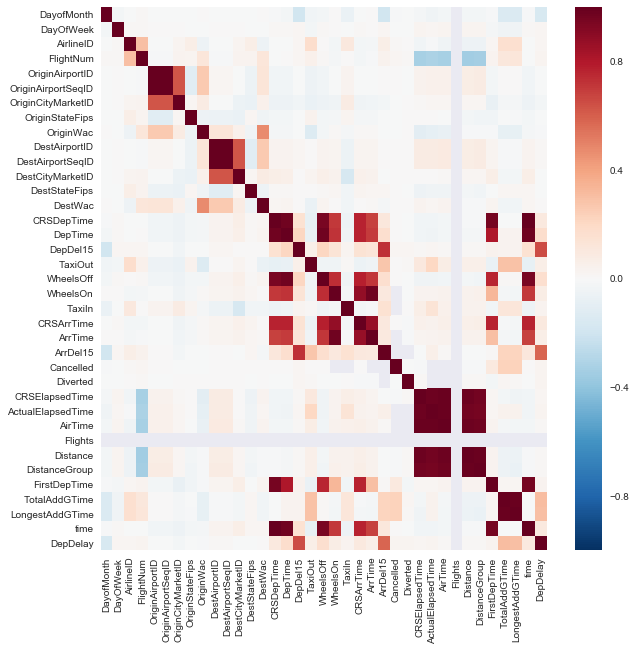

In [101]:
import seaborn as sns
corr = df[train_cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr)

In [103]:
df['Flights'].drop_duplicates()

0    1.0
Name: Flights, dtype: float64

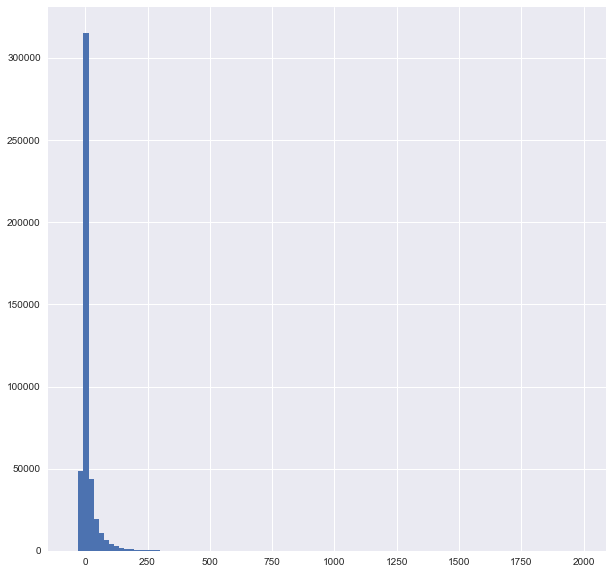

In [9]:
plt.figure(figsize=(10,10))
df['DepDelay'].hist(bins=100)

In [22]:
df=df[~df['DepDelay'].isnull()]

In [26]:
df.shape

(458311, 110)

In [28]:
df.columns.values

array(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'UniqueCarrier', 'AirlineID', 'Carrier', 'TailNum', 'FlightNum',
       'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID',
       'Origin', 'OriginCityName', 'OriginState', 'OriginStateFips',
       'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID',
       'DestCityMarketID', 'Dest', 'DestCityName', 'DestState',
       'DestStateFips', 'DestStateName', 'DestWac', 'CRSDepTime',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Flights', 'Distance',
       'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraft

In [1]:
df

NameError: name 'df' is not defined

In [127]:
53*24*356

452832

In [132]:
df['FlightDate'].drop_duplicates()

0      2015-01-01
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-05
5      2015-01-06
6      2015-01-07
7      2015-01-08
8      2015-01-09
9      2015-01-10
10     2015-01-11
11     2015-01-12
12     2015-01-13
13     2015-01-14
14     2015-01-15
15     2015-01-16
16     2015-01-17
17     2015-01-18
18     2015-01-19
19     2015-01-20
20     2015-01-21
21     2015-01-22
22     2015-01-23
23     2015-01-24
24     2015-01-25
25     2015-01-26
28     2015-01-29
29     2015-01-30
30     2015-01-31
58     2015-01-28
150    2015-01-27
Name: FlightDate, dtype: object

In [147]:
df

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,time
0,2015,1,1,1,4,2015-01-01,AA,19805,AA,N787AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,855.0,-5.0,0.0,0.0,-1.0,0900-0959,17.0,912.0,1230.0,7.0,1230,1237.0,7.0,7.0,0.0,0.0,1200-1259,0.0,NaN,0.0,390.0,402.0,378.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900
1,2015,1,1,2,5,2015-01-02,AA,19805,AA,N795AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,850.0,-10.0,0.0,0.0,-1.0,0900-0959,15.0,905.0,1202.0,9.0,1230,1211.0,-19.0,0.0,0.0,-2.0,1200-1259,0.0,NaN,0.0,390.0,381.0,357.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900
2,2015,1,1,3,6,2015-01-03,AA,19805,AA,N788AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,853.0,-7.0,0.0,0.0,-1.0,0900-0959,15.0,908.0,1138.0,13.0,1230,1151.0,-39.0,0.0,0.0,-2.0,1200-1259,0.0,NaN,0.0,390.0,358.0,330.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900
3,2015,1,1,4,7,2015-01-04,AA,19805,AA,N791AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,853.0,-7.0,0.0,0.0,-1.0,0900-0959,14.0,907.0,1159.0,19.0,1230,1218.0,-12.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,390.0,385.0,352.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900
4,2015,1,1,5,1,2015-01-05,AA,19805,AA,N783AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,853.0,-7.0,0.0,0.0,-1.0,0900-0959,27.0,920.0,1158.0,24.0,1230,1222.0,-8.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,390.0,389.0,338.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900
5,2015,1,1,6,2,2015-01-06,AA,19805,AA,N799AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,856.0,-4.0,0.0,0.0,-1.0,0900-0959,85.0,1021.0,1256.0,4.0,1235,1300.0,25.0,25.0,1.0,1.0,1200-1259,0.0,NaN,0.0,395.0,424.0,335.0,1.0,2475.0,10,0.0,0.0,25.0,0.0,0.0,NaN,NaN,NaN,900
6,2015,1,1,7,3,2015-01-07,AA,19805,AA,N784AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,859.0,-1.0,0.0,0.0,-1.0,0900-0959,29.0,928.0,1209.0,12.0,1235,1221.0,-14.0,0.0,0.0,-1.0,1200-1259,0.0,NaN,0.0,395.0,382.0,341.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900
7,2015,1,1,8,4,2015-01-08,AA,19805,AA,N787AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,856.0,-4.0,0.0,0.0,-1.0,0900-0959,26.0,922.0,1155.0,3.0,1235,1158.0,-37.0,0.0,0.0,-2.0,1200-1259,0.0,NaN,0.0,395.0,362.0,333.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900
8,2015,1,1,9,5,2015-01-09,AA,19805,AA,N795AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91,900,901.0,1.0,1.0,0.0,0.0,0900-0959,43.0,944.0,1237.0,4.0,1235,1241.0,6.0,6.0,0.0,0.0,1200-1259,0.0,NaN,0.0,395.0,400.0,353.0,1.0,2475.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900
9,2015,1,1,10,6,2015-01-10,AA,19805,AA,N790AA,1,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22,12892,1289203,3

In [145]:
cities = df['OriginCityName'].drop_duplicates().values

In [148]:
cities

array(['New York, NY', 'Los Angeles, CA', 'Dallas/Fort Worth, TX',
       'Kahului, HI', 'Honolulu, HI', 'San Francisco, CA', 'Atlanta, GA',
       'Boston, MA', 'Ontario, CA', 'Washington, DC', 'Las Vegas, NV',
       'Phoenix, AZ', 'Jacksonville, FL', 'Miami, FL', 'Tampa, FL',
       'Philadelphia, PA', 'San Juan, PR', 'Hayden, CO', 'San Diego, CA',
       'Chicago, IL', 'Seattle, WA', 'Detroit, MI', 'San Jose, CA',
       'Salt Lake City, UT', 'Kona, HI', 'Orlando, FL', 'Denver, CO',
       'St. Louis, MO', 'Jackson, WY', 'Cleveland, OH', 'Houston, TX',
       'Tucson, AZ', 'Portland, OR', 'New Orleans, LA', 'Santa Ana, CA',
       'Hartford, CT', 'Fort Myers, FL', 'San Antonio, TX',
       'Milwaukee, WI', 'West Palm Beach/Palm Beach, FL', 'Charlotte, NC',
       'Baltimore, MD', 'Nashville, TN', 'Mission/McAllen/Edinburg, TX',
       'Newark, NJ', 'Austin, TX', 'Raleigh/Durham, NC', 'Lihue, HI',
       'Kansas City, MO', 'Norfolk, VA', 'Colorado Springs, CO',
       'Charlotte Ama

In [131]:
df.groupby(['FlightDate','OriginCityName','time']).size()

FlightDate  OriginCityName     time
2015-01-01  Aberdeen, SD       500     1
                               1300    1
            Adak Island, AK    1700    1
            Aguadilla, PR      300     2
                               400     1
                               600     1
                               1100    1
            Akron, OH          600     1
                               700     2
                               800     1
                               900     1
                               1100    2
                               1200    2
                               1300    2
                               1600    2
            Albany, GA         1500    1
            Albany, NY         600     1
                               700     2
                               800     1
                               900     1
                               1000    1
                               1100    1
                               1200    1
                     

In [3]:
from pydap.client import open_url

# setup the connection
url = 'http://nomads.ncdc.noaa.gov/dods/NCEP_NARR_DAILY/197901/197901/narr-a_221_197901dd_hh00_000'
modelconn = open_url(url)
tmp2m = modelconn['tmp2m']

# grab the data
lat_index = 200    # you could tie this to tmp2m.lat[:]
lon_index = 200    # you could tie this to tmp2m.lon[:]
print (tmp2m.array[:,lat_index,lon_index] )

HTTPError: 503 Service Temporarily Unavailable
<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
<html><head>
<title>503 Service Temporarily Unavailable</title>
</head><body>
<h1>Service Temporarily Unavailable</h1>
<p>The server is temporarily unable to service your
request due to maintenance downtime or capacity
problems. Please try again later.</p>
<script id="_fed_an_ua_tag" type="text/javascript" src="//www.ncdc.noaa.gov/scripts/federated-analytics.js?agency=DOC%26subagency=NOAA"></script></body></html>


In [ ]:
df2=pd.read_csv

In [45]:

import json
from urllib.request import urlopen
f = urlopen('http://api.wunderground.com/api/3709e0f67dc256ad/history_20150405/q/CA/San_Francisco.json')
json_string = f.read()
parsed_json = json.loads(json_string)


In [ ]:
import datetime
date = datetime.datetime(2015,1,1,4,5)
for i in range(365): 
    print(date) 
    date += datetime.timedelta(days=1)

In [130]:
365*53

19345

In [118]:
parsed_json['history']['observations'][3]['date']['hour']

'03'

In [69]:
df['time']=df['CRSDepTime'].apply(lambda x : round(x/100)*100)

/Users/dgoldma1/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [72]:
df.groupby(['DestState','FlightDate','time']).size()

DestState  FlightDate  time
AK         2015-01-01  0       1
                       600     3
                       700     5
                       800     2
                       900     6
                       1000    3
                       1100    6
                       1200    4
                       1300    4
                       1400    4
                       1500    5
                       1600    3
                       1700    2
                       1800    5
                       1900    4
                       2000    3
                       2100    3
                       2200    3
                       2300    3
                       2400    2
           2015-01-02  0       1
                       600     5
                       700     6
                       800     3
                       900     6
                       1000    4
                       1100    6
                       1200    6
                       1300    5
               

In [54]:
parsed_json['history']['dailysummary']

[{'coolingdegreedays': '0',
  'coolingdegreedaysnormal': '0',
  'date': {'hour': '12',
   'mday': '05',
   'min': '00',
   'mon': '04',
   'pretty': '12:00 PM PDT on April 05, 2015',
   'tzname': 'America/Los_Angeles',
   'year': '2015'},
  'fog': '0',
  'gdegreedays': '4',
  'hail': '0',
  'heatingdegreedays': '11',
  'heatingdegreedaysnormal': '9',
  'humidity': '',
  'maxdewpti': '52',
  'maxdewptm': '11',
  'maxhumidity': '100',
  'maxpressurei': '29.99',
  'maxpressurem': '1015',
  'maxtempi': '59',
  'maxtempm': '15',
  'maxvisi': '10',
  'maxvism': '16',
  'maxwspdi': '22',
  'maxwspdm': '35',
  'meandewpti': '46',
  'meandewptm': '8',
  'meanpressurei': '29.93',
  'meanpressurem': '1013',
  'meantempi': '54',
  'meantempm': '12',
  'meanvisi': '9',
  'meanvism': '15',
  'meanwdird': '230',
  'meanwdire': '',
  'meanwindspdi': '8',
  'meanwindspdm': '12',
  'mindewpti': '41',
  'mindewptm': '5',
  'minhumidity': '53',
  'minpressurei': '29.91',
  'minpressurem': '1013',
  'minte

In [35]:
df=df[df.columns[0:64]]

In [39]:
from pydap.client import open_url

# setup the connection
url = 'http://nomads.ncdc.noaa.gov/dods/NCEP_NARR_DAILY/197901/197901/narr-a_221_197901dd_hh00_000'
modelconn = open_url(url)
tmp2m = modelconn['tmp2m']

# grab the data
lat_index = 200    # you could tie this to tmp2m.lat[:]
lon_index = 200    # you could tie this to tmp2m.lon[:]
print (tmp2m.array[:,lat_index,lon_index] )

HTTPError: 503 Service Temporarily Unavailable
<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">
<html><head>
<title>503 Service Temporarily Unavailable</title>
</head><body>
<h1>Service Temporarily Unavailable</h1>
<p>The server is temporarily unable to service your
request due to maintenance downtime or capacity
problems. Please try again later.</p>
<script id="_fed_an_ua_tag" type="text/javascript" src="//www.ncdc.noaa.gov/scripts/federated-analytics.js?agency=DOC%26subagency=NOAA"></script></body></html>


In [20]:
len(df_delays[df_delays==0])/len(df_delays)

0.05167373097742825

In [10]:
df_delays = df['DepDelay'].sort_values()

In [16]:
len(df_delays[df_delays.isnull()])/len(df_delays)

0.02480381643005481

Automatically created module for IPython interactive environment
Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


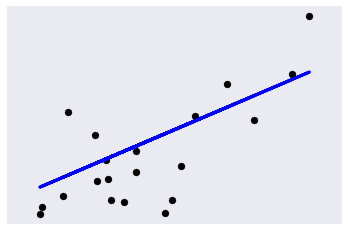

In [3]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()